In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
comunas = gpd.read_file('D:/data/DPA/DPA INE/Comuna.shp')

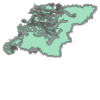

In [20]:
comunas.loc[0,'geometry'].simplify(tolerance = 0.01, preserve_topology = False)

In [21]:
comunas_simplificado = comunas.copy()
comunas_simplificado['geometry'] = comunas_simplificado['geometry'].simplify(tolerance = 0.01, preserve_topology = False)

In [80]:
mpto.within(comunas_simplificado.loc[0,'geometry']).value_counts()

False    151229
True        316
dtype: int64

In [66]:
mpto.unary_union.bounds

(-109.44074350661747,
 -54.93777383737497,
 -67.58993072164897,
 -18.194456349657465)

In [23]:
m = gpd.read_file('D:/data/Microdatos_Censo_2017 _Manzana-shp/microdatos-censo-2017-manzana.shp')

In [24]:
p = gpd.read_file('D:/data/poligonos_sii/poligonos.shp')

In [34]:
m = m.to_crs('EPSG:4674')

In [26]:
import shapely
import shapely.speedups

shapely.speedups.enable()

In [35]:
mpto = m.copy()

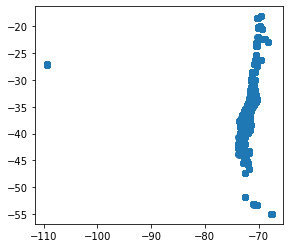

In [39]:
mpto['geometry'] = mpto['geometry'].centroid
mpto.plot()

In [53]:
mpto.within(comunas_simplificado.boundary.convex_hull).value_counts()

False    151543
True          2
dtype: int64

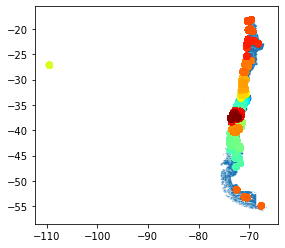

In [43]:
base = comunas_simplificado.plot()
mpto.plot(ax = base, cmap = 'jet')

In [ ]:
gpd.overlay(mpto,comunas_simplificado,how='intersection')

In [58]:
comunas_simplificado.contains(mpto).value_counts()

False    151544
True          1
dtype: int64

In [82]:
gpd.sjoin(mpto,comunas_simplificado,how = 'inner', op = 'within')

,FID,CUT,REGION_left,PROVINCIA_left,COMUNA_left,Shape__Are,Shape__Len,NOMBRE_DIS,CODIGO_DIS,MANZENT,...,VIV_AGUA_C,VIV_AGUA_1,geometry,index_right,REGION_right,PROVINCIA_right,COMUNA_right,DESC_REGIO,DESC_PROVI,DESC_COMUN
0,1,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,14688.972656,1045.701381,MATADERO,21,13101211002011,...,0,0,POINT (-70.64895 -33.47388),169,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO
3,4,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,4863.097656,440.080763,MATADERO,21,13101211002010,...,0,0,POINT (-70.64973 -33.47385),169,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO
7,8,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,16242.384766,512.585232,SAN EUGENIO,24,13101241001026,...,0,0,POINT (-70.66982 -33.47376),169,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO
9,10,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,4872.447266,449.701627,MATADERO,21,13101211002006,...,0,0,POINT (-70.65036 -33.47387),169,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO
11,12,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,20786.480469,571.978450,SAN EUGENIO,24,13101241001025,...,0,0,POINT (-70.67096 -33.47377),169,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151540,151541,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES,13107.398438,658.189825,SOR VICENTA,21,8301211007901,...,0,0,POINT (-72.33995 -37.45435),305,8,83,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES
151541,151542,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES,46177.664062,1302.556287,SANTA FÉ,19,8301191002901,...,0,0,POINT (-72.61882 -37.39655),305,8,83,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES
151542,151543,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES,115274.300781,3696.452906,SAN CARLOS DE PURÉN,15,8301151001901,...,0,0,POINT (-72.27667 -37.59334),305,8,83,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES
151543,151544,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES,151609.929688,2270.638949,SANTA FÉ,19,8301191001901,...,0,0,POINT (-72.57897 -37.46976),305,8,83,8301,REGIÓN DEL BIOBÍO,BIOBÍO,LOS ÁNGELES
